In [152]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import seaborn as sns

In [153]:
states = pd.read_excel("2007-2016-PIT-Counts-by-State.xlsx")

In [154]:
states.head()

,state,"Change in Total Homelessness, 2015-2016","Change in Total Homelessness, 2014-2016","Change in Total Homelessness, 2013-2016","Change in Total Homelessness, 2012-2016","Change in Total Homelessness, 2011-2016","Change in Total Homelessness, 2010-2016","Change in Total Homelessness, 2009-2016","Change in Total Homelessness, 2008-2016","Change in Total Homelessness, 2007-2016"
0,AK,-0.008180,0.087444,-0.003083,0.014114,-0.088346,0.041331,-0.026104,0.178615,0.181486
1,AL,0.035516,-0.098663,-0.123267,-0.210789,-0.260345,-0.320046,-0.323849,-0.236867,-0.245965
2,AR,-0.037891,-0.161104,-0.353882,-0.415520,-0.280666,-0.108255,-0.136396,-0.243318,-0.357925
3,AZ,-0.019099,-0.075083,-0.080951,-0.141125,-0.075876,-0.292028,-0.340602,-0.222694,-0.337225
4,CA,0.020771,0.036770,-0.003458,-0.016287,-0.055831,-0.043230,-0.044761,-0.134687,-0.149972


In [155]:
df = pd.read_csv("2007-2016-HIC-Counts-by-CoC.csv")

In [156]:
df.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [157]:
df.Measures.unique()

array(['Chronically Homeless Individuals', 'Homeless Individuals',
       'Homeless People in Families',
       'Sheltered Chronically Homeless Individuals', 'Sheltered Homeless',
       'Sheltered Homeless Individuals',
       'Sheltered Homeless People in Families', 'Total Homeless',
       'Unsheltered Chronically Homeless Individuals',
       'Unsheltered Homeless', 'Unsheltered Homeless Individuals',
       'Unsheltered Homeless People in Families', 'Chronically Homeless',
       'Chronically Homeless People in Families', 'Homeless Veterans',
       'Sheltered Chronically Homeless',
       'Sheltered Chronically Homeless People in Families',
       'Sheltered Homeless Veterans', 'Unsheltered Chronically Homeless',
       'Unsheltered Chronically Homeless People in Families',
       'Unsheltered Homeless Veterans', 'Children of Parenting Youth',
       'Homeless Unaccompanied Children (Under 18)',
       'Homeless Unaccompanied Young Adults (Age 18-24)',
       'Homeless Unaccompan

In [158]:
df.shape

(86529, 6)

In [159]:
df.dtypes

Year          object
State         object
CoC Number    object
CoC Name      object
Measures      object
Count         object
dtype: object

In [160]:
df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum().head()

Count
State Year              
AK    1/1/2007    974668
      1/1/2008  1,023623
      1/1/2009  1,267725
      1/1/2010  1,231632
      1/1/2011  1,223905

In [161]:
df['Count'] = df['Count'].str.replace(',', '').astype(int)

In [162]:
df.dtypes

Year          object
State         object
CoC Number    object
CoC Name      object
Measures      object
Count          int64
dtype: object

In [163]:
df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum().head()

Count
State Year           
AK    1/1/2007   1642
      1/1/2008   1646
      1/1/2009   1992
      1/1/2010   1863
      1/1/2011   2128

In [164]:
df[df['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum().head()

Count
State Year           
AK    1/1/2007   1642
      1/1/2008   1646
      1/1/2009   1992
      1/1/2010   1863
      1/1/2011   2128

In [165]:
#df['Year'] = pd.to_datetime(df['Year'])

In [166]:
#df.head()

In [167]:
import re

In [168]:
df['Year'] = df['Year'].str.extract('\d{1,2}/\d{1,2}/(\d{2,4})')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [169]:
df.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [170]:
df.drop(['CoC Number','CoC Name'], axis=1, inplace=True)

In [171]:
df.head()

,Year,State,Measures,Count
0,2007,AK,Chronically Homeless Individuals,224
1,2007,AK,Homeless Individuals,696
2,2007,AK,Homeless People in Families,278
3,2007,AK,Sheltered Chronically Homeless Individuals,187
4,2007,AK,Sheltered Homeless,842


In [172]:
df.groupby('Measures')['Count'].sum().sort_values(ascending=False).head()

Measures
Total Homeless                 6081137
Sheltered Homeless             3927844
Homeless Individuals           3816262
Homeless People in Families    2264875
Unsheltered Homeless           2153293
Name: Count, dtype: int64

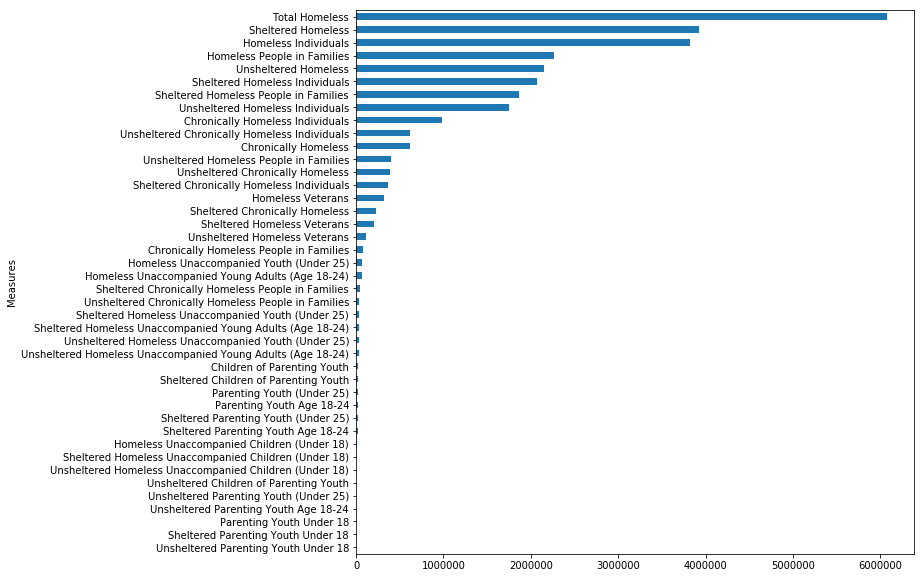

In [179]:
df.groupby('Measures')['Count'].sum().sort_values(ascending=True).plot(kind='barh')

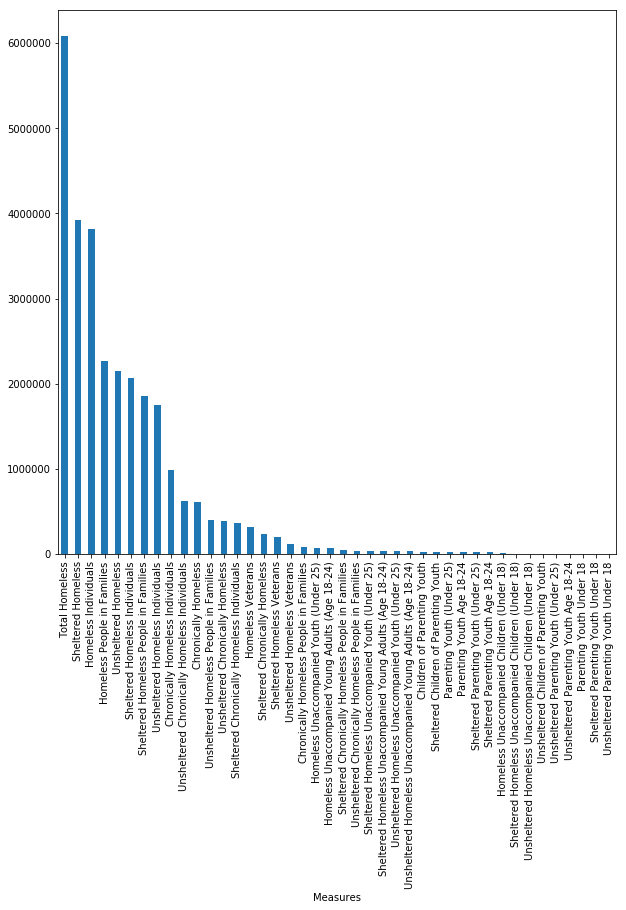

In [176]:
ax = df.groupby('Measures')['Count'].sum().sort_values(ascending=False).plot(kind='bar')
#ax.set_title("Homeless people in the US from 2007 to 2016")
#ax.set_xlabel("Category")

plt.savefig("homeless_category.pdf")

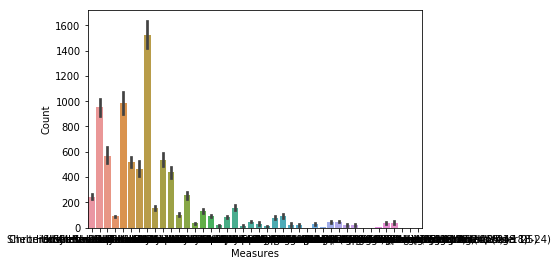

In [174]:
sns.barplot(x="Measures", y="Count", data=df)

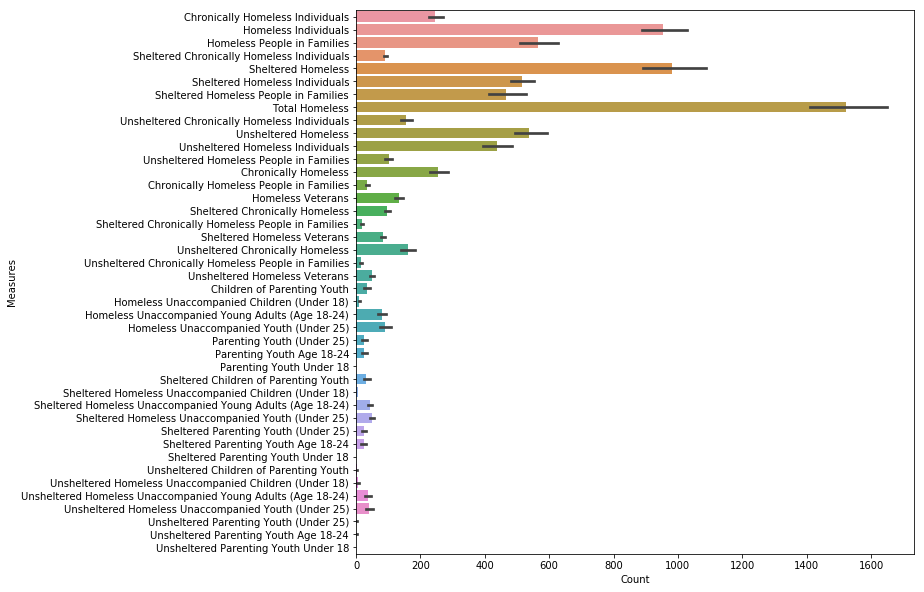

In [175]:
plt.rcParams['figure.figsize']=(10,10)
sns.barplot(x="Count", y="Measures", data=df)